**Name:** LI XINYAN

**EID:** 55670594

# CS5489 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [ ]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)

Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [ ]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [ ]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [ ]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [ ]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(i, newsgroups_train.target_names[newsgroups_train.target[i]]))
#     print(newsgroups_train.data[i])

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### 1. Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [ ]:
### INSERT YOUR CODE HERE

In [ ]:
# BoW Version Test
# from sklearn.feature_extraction.text import CountVectorizer
# cntvect = CountVectorizer(stop_words='english', max_features=200)

# # Notice: diff between fit_trasf() and tasf()
# trainX = cntvect.fit_transform(newsgroups_train.data)
# testX  = cntvect.transform(newsgroups_test.data)

# print(cntvect.vocabulary_)

### 2. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [ ]:
# MODEL=BOW  This part aims at finding better params

from sklearn.feature_extraction.text import CountVectorizer

for m_f in range(0, 10):
    max_features = 50 + 50*m_f
    cntvect = CountVectorizer(stop_words='english', max_features=max_features)
    
    trainX = cntvect.fit_transform(newsgroups_train.data)
    testX  = cntvect.transform(newsgroups_test.data)
    
    for i in range(0, 101):
        # build model
        alp = 0.0 + i/100
        bmodel = naive_bayes.BernoulliNB(alpha=alp)
        bmodel.fit(trainX, newsgroups_train.target)
    
        # test model
        testY = newsgroups_test.target
        predY = bmodel.predict(testX)
    
        # calculate accuracy
        acc = metrics.accuracy_score(testY, predY)
        print()
        
        print("max_features:{}  alpha value:{}  accuracy:{}".format(max_features, alp, acc))

In [ ]:
# This part is a sample code from lecture
# a function for plotting the word probabilities
def plotWordProb(model):
    xr = arange(0,len(cntvect.vocabulary_))
    
    # a larger figure
    plt.figure(figsize=(16,3))
    
    plt.bar(xr+0.0, exp(model.feature_log_prob_[0,:]), width=0.4, color='b', label=newsgroups_train.target_names[0])
    plt.bar(xr+0.5, exp(model.feature_log_prob_[1,:]), width=0.4, color='r', label=newsgroups_train.target_names[1])
    plt.bar(xr+1.0, exp(model.feature_log_prob_[2,:]), width=0.4, color='g', label=newsgroups_train.target_names[2])
    plt.bar(xr+1.5, exp(model.feature_log_prob_[3,:]), width=0.4, color='y', label=newsgroups_train.target_names[3])
    
    plt.legend()
    plt.xlabel('word index'); plt.ylabel('probability of word present');
    plt.xlim(min(xr), max(xr)+1)
    
# show plot
plotWordProb(bmodel)
plt.title('probability of word present');

In [ ]:
# # This part is a sample code from lecture
# # prediction
# testY = newsgroups_test.target
# predY = bmodel.predict(testX)
# print("predictions: ", predY)
# print("actual:      ", testY)

# # calculate accuracy
# acc = metrics.accuracy_score(testY, predY)
# print('accuracy',acc)

# # misclassified items' index
# print()
# print('Misclassified items:')
# inds = where(predY != testY)
# print(inds)

What are the most informative words for each category?  Run the below code.

Note: `model.coef_[i]` will index the scores for the i-th class

In [ ]:
# get the most informative words for each category
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.coef_[i][t]))

### 3. Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [ ]:
### INSERT YOUR CODE HERE

In [ ]:
# # MODEL=TFIDF  This part aims at finding better params

# from sklearn.feature_extraction.text import TfidfVectorizer

# cntvect = TfidfVectorizer(stop_words='english')
# trainX = cntvect.fit_transform(newsgroups_train.data)
# testX = cntvect.transform(newsgroups_test.data)

# for i in range(0, 101):
#     # build model
#     alp = 0.0 + i/100
#     mmodel_tf = naive_bayes.MultinomialNB(alpha=alp)
#     mmodel_tf.fit(trainX, newsgroups_train.target)
    
#     # test model
#     testY = newsgroups_test.target
#     predY = mmodel_tf.predict(testX)
    
#     # calculate accuracy
#     acc = metrics.accuracy_score(testY, predY)
#     print("alpha:{}  accuracy:{}".format(alp, acc))




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

cntvect = TfidfVectorizer(stop_words='english')
trainX = cntvect.fit_transform(newsgroups_train.data)

testX = cntvect.transform(newsgroups_test.data)
# here, select alpha=1.0
alp=1.0
mmodel_tf = naive_bayes.MultinomialNB(alpha=alp)
mmodel_tf.fit(trainX, newsgroups_train.target)
    
# test model
testY = newsgroups_test.target
predY = mmodel_tf.predict(testX)
    
# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print("alpha:{}  accuracy:{}".format(alp, acc))

What are the most informative features for Multinomial model? Run the below code.

In [ ]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.coef_[i][t]))

How do the most informative words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**
1. In this problem, it seems that the TFIDF multinomial model can reach a higher accuracy;

2. Some informative words appears in both two models and even all the 4 classes: 'think', 'don', 'does', 'just', 'like'. These words are not so meaningful, and it appears in Bernoulli model more frequently, which means TF-IDF multinomial model actually can extract more meaningful/informative words to distinguish different classes.

3. Maybe 2 is the reason why TFIDF multinomial model can reach a higher accuracy.


Some notes(not useful for this question but I would like to mark it down)

在多项式模型中：
在多项式模型中， 设某文档d=(t1,t2,…,tk)，tk是该文档中出现过的单词，允许重复，则
先验概率P(c)= 类c下单词总数/整个训练样本的单词总数
类条件概率P(tk|c)=(类c下单词tk在各个文档中出现过的次数之和+1)/(类c下单词总数+|V|)
V是训练样本的单词表（即抽取单词，单词出现多次，只算一个），|V|则表示训练样本包含多少种单词。 P(tk|c)可以看作是单词tk在证明d属于类c上提供了多大的证据，而P(c)则可以认为是类别c在整体上占多大比例(有多大可能性)。

在伯努利模型中：
P(c)= 类c下文件总数/整个训练样本的文件总数
P(tk|c)=(类c下包含单词tk的文件数+1)/(类c下单词总数+2)

In [ ]:
# Bernoulli model	# TFIDF multinomial model
class alt.atheism	class alt.atheism
    time      (-1.79592)	    islam     (-8.25626)
    know      (-1.60323)	    does      (-8.16313)
    does      (-1.60323)	    religion  (-8.09550)
    god       (-1.58282)	    atheism   (-8.07971)
    like      (-1.54322)	    say       (-8.02931)
    say       (-1.52398)	    just      (-7.96848)
    just      (-1.45056)	    think     (-7.85944)
    think     (-1.39045)	    don       (-7.76627)
    people    (-1.29514)	    people    (-7.73502)
    don       (-1.18751)	    god       (-7.52925)
class comp.graphics	class comp.graphics
    just      (-1.94250)	    windows   (-8.01724)
    don       (-1.90741)	    does      (-8.00695)
    program   (-1.87351)	    looking   (-7.99620)
    need      (-1.85153)	    program   (-7.91803)
    does      (-1.73859)	    know      (-7.87877)
    use       (-1.72893)	    file      (-7.79266)
    like      (-1.60264)	    image     (-7.76055)
    know      (-1.50579)	    files     (-7.75395)
    graphics  (-1.49052)	    thanks    (-7.54107)
    thanks    (-1.46805)	    graphics  (-7.34223)
class sci.space	class sci.space
    earth     (-1.89993)	    earth     (-8.21965)
    use       (-1.87770)	    think     (-8.20595)
    time      (-1.76359)	    shuttle   (-8.20250)
    nasa      (-1.72512)	    orbit     (-8.06025)
    think     (-1.72512)	    moon      (-8.05321)
    know      (-1.72512)	    just      (-8.04562)
    don       (-1.68808)	    launch    (-8.04375)
    just      (-1.46858)	    like      (-7.93036)
    like      (-1.41183)	    nasa      (-7.73847)
    space     (-1.01792)	    space     (-7.00696)
class talk.religion.misc	class talk.religion.misc
    say       (-1.64708)	    objective (-8.39002)
    way       (-1.62005)	    think     (-8.35055)
    like      (-1.60680)	    just      (-8.33847)
    does      (-1.53082)	    bible     (-8.32675)
    know      (-1.48319)	    don       (-8.31312)
    think     (-1.41575)	    christians (-8.30271)
    god       (-1.37319)	    christian (-8.12116)
    don       (-1.35257)	    people    (-8.06820)
    just      (-1.34242)	    jesus     (-7.82729)
    people    (-1.31256)	    god       (-7.65021)

Finally, look at a few of the misclassified documents. 

In [ ]:
### INSERT YOUR CODE HERE ###

In [ ]:
# This part is a sample code from lecture
# prediction
testY = newsgroups_test.target
predY = mmodel_tf.predict(testX)
print("predictions: ", predY)
print("actual:      ", testY)

# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print('accuracy',acc)

# misclassified items' index
print()
print('Misclassified items:')
inds = where(predY != testY)
print(inds)

for i in inds[0]:
    print("true={}, pred={}".format(newsgroups_train.target_names[testY[i]], newsgroups_train.target_names[predY[i]])) 
    print(newsgroups_test.data[i])
    print()

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**
I think because the misclassified text contains too many informative words, even though it belongs to another class.
Also, the boundary of class 'talk.religion.misc' and 'alt.atheism' is not very clear, the text belong to these two class often use same words to convey the totally different ideas.

### 4. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [ ]:
## INSERT YOUR CODE HERE
# MODEL=TFIDF  This part aims at finding better params

from sklearn.feature_extraction.text import TfidfVectorizer

alp_list=[]
acc_list=[]

# max_features : int or None, default=None
# If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
cntvect = TfidfVectorizer(stop_words='english', max_features=None)

trainX = cntvect.fit_transform(newsgroups_train.data)
testX = cntvect.transform(newsgroups_test.data)

for i in range(0, 101):
    # build model
    alp = 0.0 + i/100
    alp_list.append(alp)
    mmodel_tf = naive_bayes.MultinomialNB(alpha=alp)
    mmodel_tf.fit(trainX, newsgroups_train.target)
    
    # test model
    testY = newsgroups_test.target
    predY = mmodel_tf.predict(testX)
    
    # calculate accuracy
    acc = metrics.accuracy_score(testY, predY)
    acc_list.append(acc)
    print("alpha:{}  accuracy:{}".format(alp, acc))


In [ ]:
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.axis([0, 1, 0, 1])  # set the axis (xmin, xmax, ymin, ymax)
plt.scatter(alp_list, acc_list)
plt.show()

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [27]:
### INSERT YOUR CODE HERE
## INSERT YOUR CODE HERE
# MODEL=TFIDF  This part aims at finding better params, here use alpha=0.04 according to the above experiment

from sklearn.feature_extraction.text import TfidfVectorizer

mxf_list=[]
acc_list=[]

for i in range(0, 100):
    mxf = 10 + i*50
    mxf_list.append(mxf)
    
    cntvect = TfidfVectorizer(stop_words='english', max_features=mxf)
    trainX = cntvect.fit_transform(newsgroups_train.data)
    testX = cntvect.transform(newsgroups_test.data)
    
    # build model
    mmodel_tf = naive_bayes.MultinomialNB(alpha=0.04)
    mmodel_tf.fit(trainX, newsgroups_train.target)
    
    # test model
    testY = newsgroups_test.target
    predY = mmodel_tf.predict(testX)
    
    # calculate accuracy
    acc = metrics.accuracy_score(testY, predY)
    acc_list.append(acc)
    print("alpha:{}  accuracy:{}".format(mxf, acc))

alpha:10  accuracy:0.4198078344419808
alpha:60  accuracy:0.5883222468588323
alpha:110  accuracy:0.6348854397634885
alpha:160  accuracy:0.6622320768662232
alpha:210  accuracy:0.6659275683665927
alpha:260  accuracy:0.6755358462675536
alpha:310  accuracy:0.6836659275683666
alpha:360  accuracy:0.6947524020694752
alpha:410  accuracy:0.704360679970436
alpha:460  accuracy:0.704360679970436
alpha:510  accuracy:0.7080561714708056
alpha:560  accuracy:0.7102734663710274
alpha:610  accuracy:0.7191426459719142
alpha:660  accuracy:0.721359940872136
alpha:710  accuracy:0.7191426459719142
alpha:760  accuracy:0.7154471544715447
alpha:810  accuracy:0.7243163340724317
alpha:860  accuracy:0.7265336289726534
alpha:910  accuracy:0.7272727272727273
alpha:960  accuracy:0.7272727272727273
alpha:1010  accuracy:0.7361419068736141
alpha:1060  accuracy:0.7376201034737621
alpha:1110  accuracy:0.7376201034737621
alpha:1160  accuracy:0.7442719881744272
alpha:1210  accuracy:0.7413155949741316
alpha:1260  accuracy:0.74

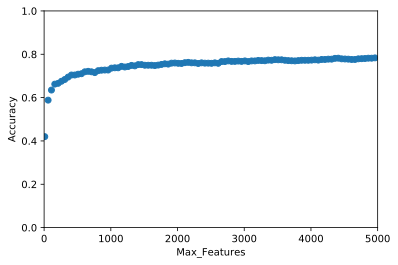

In [28]:
plt.xlabel("Max_Features")
plt.ylabel("Accuracy")
plt.axis([0, 5000, 0, 1])  # set the axis (xmin, xmax, ymin, ymax)
plt.scatter(mxf_list, acc_list)
plt.show()